<a href="https://colab.research.google.com/github/marwankashef/NLP/blob/master/NLP_Project_Customer_Persona_through_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install autocorrect
!pip install Unidecode
!pip install textstat

     |████████████████████████████████| 1.8MB 3.5MB/s 
  Created wheel for autocorrect: filename=autocorrect-2.0.0-cp36-none-any.whl size=1811641 sha256=7f9e4e7ced3eed4e344f0bb10c6a8d316cd912d654a4e3cc8a5adb22688dab48
  Stored in directory: /root/.cache/pip/wheels/0b/06/bc/e66f28d72bed29591eadc79cebb2e7964ad0282804ab233da3
Successfully built autocorrect
     |████████████████████████████████| 245kB 3.4MB/s 
     |████████████████████████████████| 102kB 2.7MB/s 
     |████████████████████████████████| 3.0MB 10.3MB/s 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import unidecode
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import spacy
import tweepy
import json
import math
import time
import re

nltk.download('vader_lexicon')

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from scipy import spatial
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.cluster import KMeans, DBSCAN
from autocorrect import Speller
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from autocorrect import Speller

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from google.colab import files

plt.style.use('classic')
%matplotlib inline
sns.set()

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#df = pd.read_csv("/content/drive/My Drive/MMAI 891 - NLP/Womens Clothing E-Commerce Reviews.csv")
df = pd.read_csv("gdrive/My Drive/MMAI 891 - NLP/Womens Clothing E-Commerce Reviews.csv")

In [ ]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


Using Regex Expressions to Clean Reviews

In [ ]:
# Apply basic pre-processing to the data

spell = Speller(lang='en')

stop_words = set(stopwords.words('english') + stopwords.words('spanish'))

lemmer = WordNetLemmatizer()

def preprocess(x):
    # Lower case
    x = x.lower()
    
    # Remove punctuation
    x = re.sub(r'[^\w\s]', '', x)
    
    # Remove non-unicode
    x = unidecode.unidecode(x)
    
    # Remove numbers
    x = re.sub(r'\d+', '', x)

    # Spell check
    x = spell(x)
    
    # Remove stopwords and lemmatize
    x = [lemmer.lemmatize(w) for w in x.split()]# if w not in stop_words]
    return ' '.join(x) 

In [ ]:
df['Review Text'].dropna(inplace=True)

In [ ]:
df_text = df['Review Text'].apply(preprocess)

In [ ]:
df = df.merge(df_text, left_index=True, right_index=True)

In [ ]:
df.head()

In [ ]:
df = df.drop(['Unnamed: 0','Clothing ID','Review Text_x'],axis=1)

In [ ]:
df = df.rename(columns={'Review Text_y':'Review Text'})

In [ ]:
df.head()

In [ ]:
df = df.drop(['Title','Division Name','Department Name','Class Name'],axis=1)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_df = 0.5, min_df=0.05, max_features = 1000, ngram_range=[1,3])
dtm = vectorizer.fit_transform(df['Review Text'])

In [ ]:
dtm.shape

In [ ]:
vectorizer.get_feature_names()

['about',
 'all',
 'also',
 'am',
 'an',
 'and it',
 'and the',
 'are',
 'arm',
 'at',
 'at the',
 'back',
 'be',
 'beautiful',
 'because',
 'been',
 'better',
 'big',
 'bit',
 'black',
 'bottom',
 'bought',
 'but it',
 'but the',
 'can',
 'color',
 'comfortable',
 'could',
 'cut',
 'cute',
 'definitely',
 'design',
 'detail',
 'did',
 'didnt',
 'do',
 'doe',
 'dont',
 'down',
 'dress',
 'dress is',
 'enough',
 'even',
 'fabric',
 'fabric is',
 'fall',
 'feel',
 'first',
 'fit',
 'flattering',
 'for',
 'for me',
 'for the',
 'from',
 'front',
 'get',
 'go',
 'going',
 'good',
 'got',
 'great',
 'ha',
 'had',
 'have',
 'how',
 'however',
 'if',
 'if you',
 'im',
 'in the',
 'is so',
 'is very',
 'it fit',
 'it in',
 'it is',
 'it look',
 'it on',
 'it wa',
 'jean',
 'just',
 'large',
 'lb',
 'length',
 'like',
 'like the',
 'little',
 'long',
 'look',
 'looked',
 'love',
 'love the',
 'love this',
 'loved',
 'made',
 'make',
 'material',
 'me',
 'medium',
 'model',
 'more',
 'much',
 'm

In [ ]:
df_bow = pd.DataFrame(dtm.toarray(), 
                      columns=vectorizer.get_feature_names(), 
                      index=df.index)

# Moving the concat till later
#df_bow = pd.concat([df, df_bow], axis=1)

df_bow.shape
df_bow.head()

(22641, 208)

,about,all,also,am,an,and it,and the,are,arm,at,at the,back,be,beautiful,because,been,better,big,bit,black,bottom,bought,but it,but the,can,color,comfortable,could,cut,cute,definitely,design,detail,did,didnt,do,doe,dont,down,dress,...,they,they are,think,this dress,this is,this top,though,tight,time,to be,to size,to the,to wear,too,top,tried,true,true to,true to size,up,usually,very,wa,waist,way,wear,wear it,wearing,well,were,what,when,which,white,will,with,with the,work,would,you
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.0,0.130838,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.160472,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.198313,0.00000,0.0,0.185523,0.0,0.0,0.0,0.0,0.0,0.116551,...,0.0,0.0,0.0,0.142706,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.185648,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.270713,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.102120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171469,0.000000,0.0,0.152099,0.0,0.0,0.132354,0.154535,0.0,0.0,0.000000,0.16273,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.099285,...,0.0,0.0,0.0,0.121565,0.0,0.0,0.0,0.166734,0.000000,0.154955,0.0,0.00000,0.000000,0.0,0.103713,0.0,0.000000,0.0,0.0,0.117088,0.0,0.097623,0.269497,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.139863,0.0,0.0,0.000000,0.0,0.143122,0.000000,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.376775,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.234095,0.378829,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.213014,0.0,0.000000,0.0,0.193204,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.25058,0.226391,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.150626,0.000000,0.0,0.0,0.161201,0.000000,0.0,0.204625,0.0,0.0,0.0,0.000000,0.0,0.0,0.254266,0.0,0.000000,0.000000,0.0


In [ ]:
#Create Lexical features
import textstat 
df['len'] = df['Review Text'].apply(lambda x: len(x))
df['syllable_count'] = df['Review Text'].apply( lambda x: textstat.syllable_count(x))
df['flesch_reading_ease'] = df['Review Text'].apply( lambda x: textstat.flesch_reading_ease(x))
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Review Text,len,syllable_count,flesch_reading_ease
0,33,4,1,0,absolutely wonderful silky and sexy and comfor...,51,14,30.53
1,34,5,1,4,love this dress it soon pretty i happened to f...,279,77,34.94
2,60,3,0,0,i had such high hope for this dress and really...,480,129,-1.61
3,50,5,1,0,i love love love this jumpsuit it fun flirty a...,113,30,66.07
4,47,5,1,6,this shirt is very flattering to all due to th...,185,43,68.78


In [ ]:
#df_bow = df_bow.drop(columns=['Age', 'Rating', 'Recommended IND','Positive Feedback Count','Review Text'])

In [ ]:
df_bow.head()

,about,all,also,am,an,and it,and the,are,arm,at,at the,back,be,beautiful,because,been,better,big,bit,black,bottom,bought,but it,but the,can,color,comfortable,could,cut,cute,definitely,design,detail,did,didnt,do,doe,dont,down,dress,...,they,they are,think,this dress,this is,this top,though,tight,time,to be,to size,to the,to wear,too,top,tried,true,true to,true to size,up,usually,very,wa,waist,way,wear,wear it,wearing,well,were,what,when,which,white,will,with,with the,work,would,you
0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.000000,0.0,0.130838,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.119879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.160472,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.198313,0.00000,0.0,0.185523,0.0,0.0,0.0,0.0,0.0,0.116551,...,0.0,0.0,0.0,0.142706,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.185648,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.270713,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.102120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.171469,0.000000,0.0,0.152099,0.0,0.0,0.132354,0.154535,0.0,0.0,0.000000,0.16273,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.099285,...,0.0,0.0,0.0,0.121565,0.0,0.0,0.0,0.166734,0.000000,0.154955,0.0,0.00000,0.000000,0.0,0.103713,0.0,0.000000,0.0,0.0,0.117088,0.0,0.097623,0.269497,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.139863,0.0,0.0,0.000000,0.0,0.143122,0.000000,0.0
3,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.376775,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.234095,0.378829,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,0.0,0.213014,0.0,0.000000,0.0,0.193204,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.25058,0.226391,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.150626,0.000000,0.0,0.0,0.161201,0.000000,0.0,0.204625,0.0,0.0,0.0,0.000000,0.0,0.0,0.254266,0.0,0.000000,0.000000,0.0


In [ ]:
df.columns

Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count',
       'Review Text', 'len', 'syllable_count', 'flesch_reading_ease'],
      dtype='object')

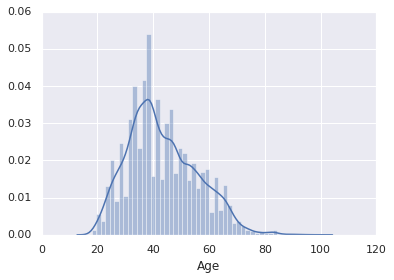

In [ ]:
sns.distplot(df['Age'])

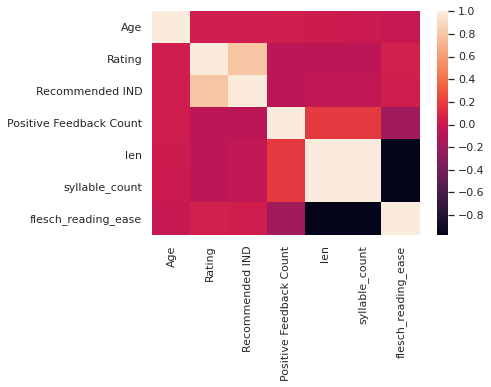

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# Add sentiment scores as extra features for regression
sid = SentimentIntensityAnalyzer()

In [ ]:
df['Sent_Scores'] = df['Review Text'].apply(lambda Review: sid.polarity_scores(Review))

In [ ]:
df['Overall_Sent_Score'] = df['Sent_Scores'].apply(lambda d: d['compound'])

In [ ]:
df['Sent_Tag'] = df['Overall_Sent_Score'].apply(lambda c: 'pos' if c > 0 else ('neu' if c == 0 else 'neg'))

In [ ]:
df.columns

Index(['Age', 'Rating', 'Recommended IND', 'Positive Feedback Count',
       'Review Text', 'len', 'syllable_count', 'flesch_reading_ease',
       'Sent_Scores', 'Overall_Sent_Score', 'Sent_Tag'],
      dtype='object')

In [ ]:
df_and_bow = pd.concat([df, df_bow], axis=1)

In [ ]:
correlation = df_and_bow.corr(method='pearson')
columns = correlation.nlargest(30, 'Age').index
columns

Index(['Age', 'will', 'fabric', 'color', 'style', 'sweater',
       'Positive Feedback Count', 'Recommended IND', 'with', 'not', 'sleeve',
       'one', 'fabric is', 'black', 'very', 'ordered', 'Rating', 'retailer',
       'jean', 'nice', 'it is', 'large', 'this is', 'white', 'ha', 'soft',
       'the fabric is', 'back', 'which', 'or'],
      dtype='object')

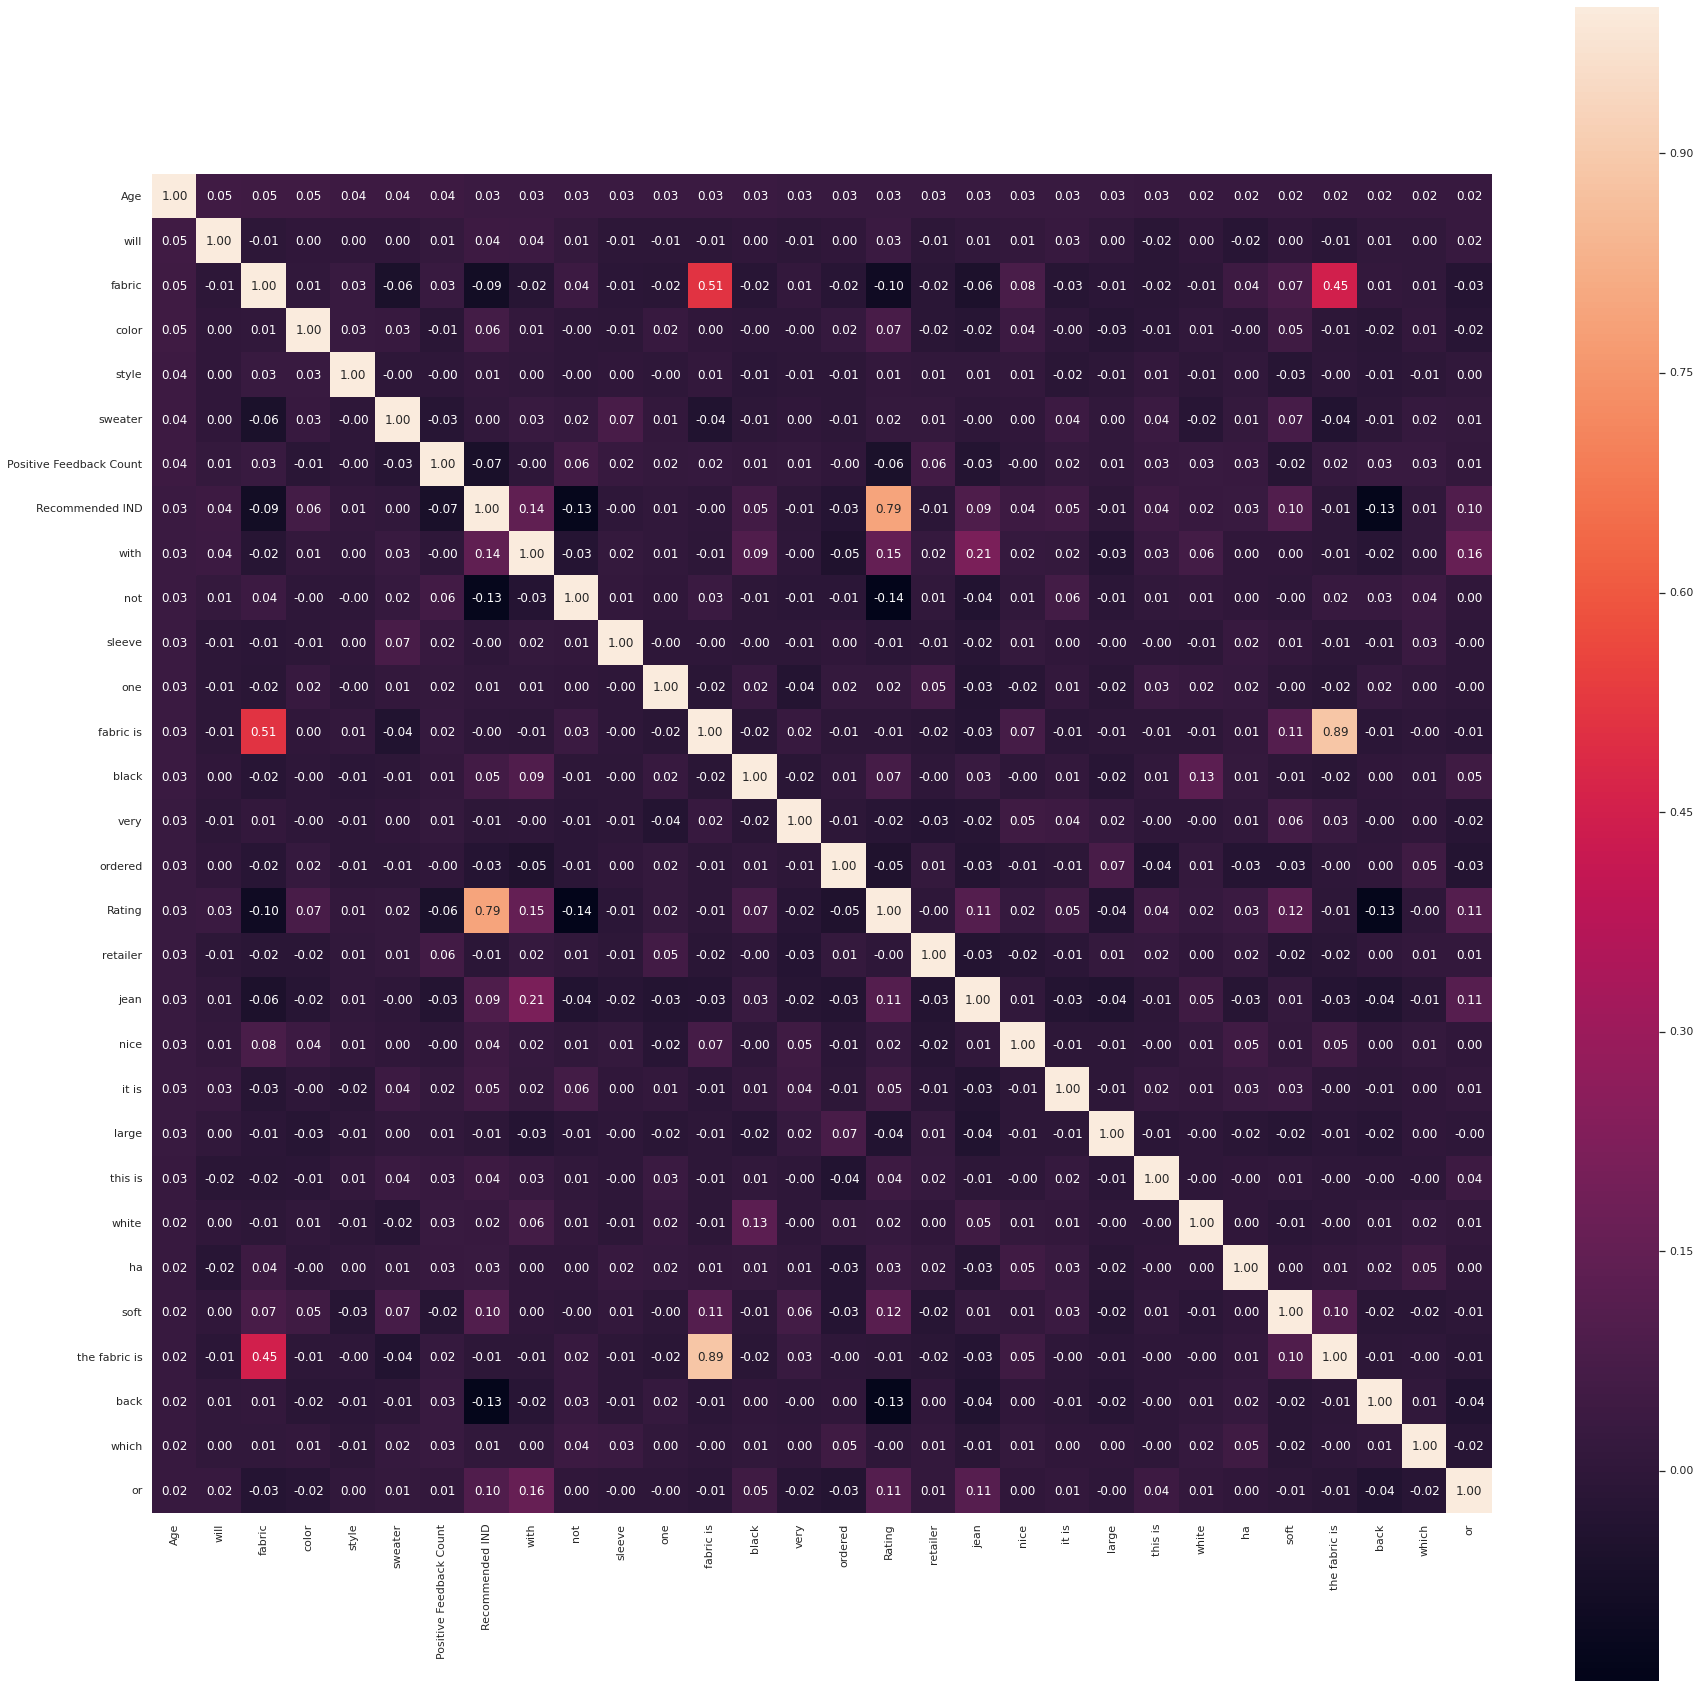

In [ ]:
correlation_map = np.corrcoef(df_and_bow[columns].values.T)
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(30,30))         # Sample figsize in inches

heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

In [ ]:
# Let's try BERT Embedding
!pip install transformers

In [ ]:
import torch
from transformers import BertTokenizer, BertModel

# OPTIONAL: if you want to have more information on what's happening, activate the logger as follows
import logging
#logging.basicConfig(level=logging.INFO)

import matplotlib.pyplot as plt
% matplotlib inline

# Load pre-trained model tokenizer (vocabulary)
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Define a new example sentence with multiple meanings of the word "bank"
text = "After stealing money from the bank vault, the bank robber was seen " \
       "fishing on the Mississippi river bank."

# Add the special tokens.
marked_text = "[CLS] " + text + " [SEP]"

# Split the sentence into tokens.
tokenized_text = tokenizer.tokenize(marked_text)

# Map the token strings to their vocabulary indeces.
indexed_tokens = tokenizer.convert_tokens_to_ids(tokenized_text)

# Display the words with their indeces.
for tup in zip(tokenized_text, indexed_tokens):
    print('{:<12} {:>6,}'.format(tup[0], tup[1]))

In [ ]:
# Drop additional features based on heatmap
X = df_and_bow.drop(['Age','Review Text', 'Rating', 'len', 'syllable_count'],axis=1)

In [ ]:
y = df_and_bow['Age']

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#Normalize using MinMaxScaler since distributions are not Gaussian
scaler = MinMaxScaler()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', scaler),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', scaler),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', scaler),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', scaler),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', scaler),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', scaler),('GBM', GradientBoostingRegressor())])))

results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=21)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLR: -145.625529 (4.158478)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledLASSO: -152.229664 (3.563714)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledEN: -152.229664 (3.563714)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledKNN: -172.225823 (4.665134)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledCART: -291.050402 (11.983458)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: -147.353969 (3.830667)


In [ ]:
# Best model based on CV results above:  Either ElasticNet OR Lasso
# Will go with ElasticNet

In [ ]:
from sklearn.model_selection import GridSearchCV

scaler = MinMaxScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
param_grid = dict(alpha=np.array([0, 0.5, 0.1, 0.01, 0.001]), l1_ratio=np.array([0, 0.25, 0.5, 0.75, 1]))
model = ElasticNet(random_state=21)
kfold = KFold(n_splits=10, random_state=21)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=kfold)
grid_result = grid.fit(X_train_scaled, y_train)

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:515: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 968248.4446229909, tolerance: 208.87201579255796
  positive)
/u

-145.625529 (4.158478) with: {'alpha': 0.0, 'l1_ratio': 0.0}
-145.625529 (4.158478) with: {'alpha': 0.0, 'l1_ratio': 0.25}
-145.625529 (4.158478) with: {'alpha': 0.0, 'l1_ratio': 0.5}
-145.625529 (4.158478) with: {'alpha': 0.0, 'l1_ratio': 0.75}
-145.625529 (4.158478) with: {'alpha': 0.0, 'l1_ratio': 1.0}
-151.625519 (3.541976) with: {'alpha': 0.5, 'l1_ratio': 0.0}
-152.211566 (3.563234) with: {'alpha': 0.5, 'l1_ratio': 0.25}
-152.229664 (3.563714) with: {'alpha': 0.5, 'l1_ratio': 0.5}
-152.229664 (3.563714) with: {'alpha': 0.5, 'l1_ratio': 0.75}
-152.229664 (3.563714) with: {'alpha': 0.5, 'l1_ratio': 1.0}
-150.016094 (3.518057) with: {'alpha': 0.1, 'l1_ratio': 0.0}
-150.795211 (3.517349) with: {'alpha': 0.1, 'l1_ratio': 0.25}
-151.319874 (3.504533) with: {'alpha': 0.1, 'l1_ratio': 0.5}
-151.672952 (3.502763) with: {'alpha': 0.1, 'l1_ratio': 0.75}
-151.849283 (3.532240) with: {'alpha': 0.1, 'l1_ratio': 1.0}
-145.886107 (3.671004) with: {'alpha': 0.01, 'l1_ratio': 0.0}
-145.788425 (3.70

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1080771.2161266105, tolerance: 230.8990534379325
  positive)


In [ ]:
from sklearn.metrics import mean_squared_error

scaler = MinMaxScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)
model = ElasticNet(random_state=21, alpha=0.001, l1_ratio=0.0)
model.fit(rescaled_X_train, y_train)

# transform the validation dataset
rescaled_X_test = scaler.transform(X_test)
predictions = model.predict(rescaled_X_test)
print (mean_squared_error(y_test, predictions))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1080771.2161266105, tolerance: 230.8990534379325
  positive)


ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.0,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=21, selection='cyclic', tol=0.0001, warm_start=False)

144.10812474566396


Text(0.5, 0, 'Y Test (True Values)')

Text(0, 0.5, 'Predicted Values')

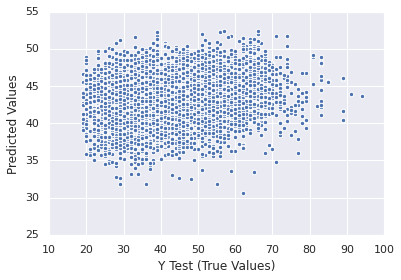

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

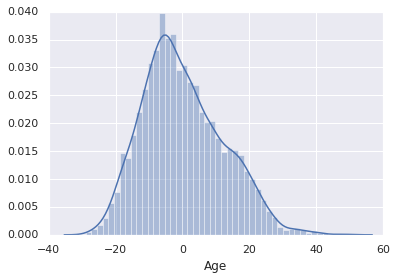

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 9.703557265966122
MSE: 144.10812474566396
RMSE: 12.004504352353077


In [ ]:
metrics.explained_variance_score(y_test,predictions)

0.04824208245635864

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train_sc,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions = lr.predict(X_test)

In [ ]:
predictions

array([ -14.84051653,  353.78664865, -205.87766102, ...,   55.00786721,
         18.43904153, -147.35638618])

Text(0.5, 0, 'Y Test (True Values)')

Text(0, 0.5, 'Predicted Values')

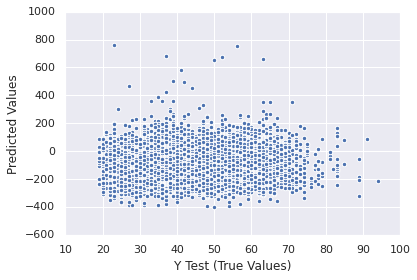

In [ ]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test (True Values)')
plt.ylabel('Predicted Values')

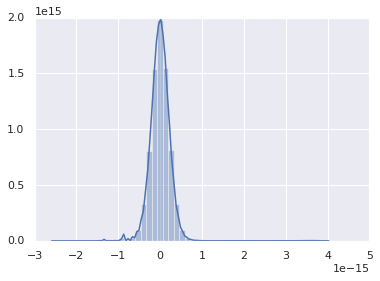

In [ ]:
sns.distplot((y_test-predictions))

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))


MAE: 1.7181954162885127e-16
MSE: 5.960490473519316e-32
RMSE: 2.441411573970951e-16


In [ ]:
metrics.explained_variance_score(y_test,predictions)

1.0

In [ ]:
#' '.join([i for i in df['Review Text']]).split()

Conduct Sentiment Analysis

In [ ]:
sid = SentimentIntensityAnalyzer()

In [ ]:
df['Sent_Scores'] = df['Review Text'].apply(lambda Review: sid.polarity_scores(Review))

In [ ]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Review Text,len,syllable_count,flesch_reading_ease,Sent_Scores
0,33,4,1,0,absolutely wonderful silky and sexy and comfor...,51,14,30.53,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp..."
1,34,5,1,4,love this dress it soon pretty i happened to f...,279,77,34.94,"{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp..."
2,60,3,0,0,i had such high hope for this dress and really...,480,129,-1.61,"{'neg': 0.027, 'neu': 0.794, 'pos': 0.179, 'co..."
3,50,5,1,0,i love love love this jumpsuit it fun flirty a...,113,30,66.07,"{'neg': 0.241, 'neu': 0.341, 'pos': 0.417, 'co..."
4,47,5,1,6,this shirt is very flattering to all due to th...,185,43,68.78,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp..."


In [ ]:
df['Overall_Sent_Score'] = df['Sent_Scores'].apply(lambda d: d['compound'])

In [ ]:
df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Review Text,len,syllable_count,flesch_reading_ease,Sent_Scores,Overall_Sent_Score
0,33,4,1,0,absolutely wonderful silky and sexy and comfor...,51,14,30.53,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932
1,34,5,1,4,love this dress it soon pretty i happened to f...,279,77,34.94,"{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...",0.9719
2,60,3,0,0,i had such high hope for this dress and really...,480,129,-1.61,"{'neg': 0.027, 'neu': 0.794, 'pos': 0.179, 'co...",0.9403
3,50,5,1,0,i love love love this jumpsuit it fun flirty a...,113,30,66.07,"{'neg': 0.241, 'neu': 0.341, 'pos': 0.417, 'co...",0.3975
4,47,5,1,6,this shirt is very flattering to all due to th...,185,43,68.78,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",0.9162


In [ ]:
df['Sent_Tag'] = df['Overall_Sent_Score'].apply(lambda c: 'pos' if c > 0 else ('neu' if c == 0 else 'neg'))

df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Review Text,len,syllable_count,flesch_reading_ease,Sent_Scores,Overall_Sent_Score,Sent_Tag
0,33,4,1,0,absolutely wonderful silky and sexy and comfor...,51,14,30.53,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932,pos
1,34,5,1,4,love this dress it soon pretty i happened to f...,279,77,34.94,"{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...",0.9719,pos
2,60,3,0,0,i had such high hope for this dress and really...,480,129,-1.61,"{'neg': 0.027, 'neu': 0.794, 'pos': 0.179, 'co...",0.9403,pos
3,50,5,1,0,i love love love this jumpsuit it fun flirty a...,113,30,66.07,"{'neg': 0.241, 'neu': 0.341, 'pos': 0.417, 'co...",0.3975,pos
4,47,5,1,6,this shirt is very flattering to all due to th...,185,43,68.78,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",0.9162,pos


Sort DataFrame from Lowest to Highest Scores

In [ ]:
df.sort_values(by='Overall_Sent_Score',ascending=True)

,Age,Rating,Recommended IND,Positive Feedback Count,Review Text,len,syllable_count,flesch_reading_ease,Sent_Scores,Overall_Sent_Score,Sent_Tag
10204,37,1,0,3,ill start by saying over the year i get more a...,356,88,23.44,"{'neg': 0.267, 'neu': 0.733, 'pos': 0.0, 'comp...",-0.9563,neg
8783,57,2,0,0,i agree with the other two review that this sh...,466,116,6.86,"{'neg': 0.188, 'neu': 0.795, 'pos': 0.017, 'co...",-0.9542,neg
7706,63,2,0,4,i wa surprised by the other review expected to...,449,114,5.51,"{'neg': 0.201, 'neu': 0.784, 'pos': 0.015, 'co...",-0.9517,neg
19829,39,2,0,0,a another reviewer wrote this is not the same ...,367,94,28.18,"{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'comp...",-0.9492,neg
15467,48,1,0,4,i purchased this jacket in my local store size...,486,128,-1.61,"{'neg': 0.185, 'neu': 0.761, 'pos': 0.054, 'co...",-0.9474,neg
...,...,...,...,...,...,...,...,...,...,...,...
1842,49,5,1,6,i really loved this top the minute i put it on...,473,125,-2.62,"{'neg': 0.0, 'neu': 0.579, 'pos': 0.421, 'comp...",0.9949,pos
20824,45,5,1,0,this dress is so gorgeous it fit perfectly is ...,329,88,26.48,"{'neg': 0.0, 'neu': 0.418, 'pos': 0.582, 'comp...",0.9950,pos
12970,36,5,1,0,i rarely write review but this one deserves on...,390,102,14.30,"{'neg': 0.026, 'neu': 0.492, 'pos': 0.482, 'co...",0.9951,pos
20043,83,5,1,0,i saw this top online and fell in love with th...,463,125,-5.33,"{'neg': 0.0, 'neu': 0.501, 'pos': 0.499, 'comp...",0.9953,pos


In [ ]:
df.drop_duplicates(subset='Review Text', keep='first',inplace=True)

In [ ]:
df['Rating Tag'] = df['Rating'].apply(lambda c: 'pos' if c >= 4 else ('neu' if c == 3 else 'neg'))

df.head()

,Age,Rating,Recommended IND,Positive Feedback Count,Review Text,len,syllable_count,flesch_reading_ease,Sent_Scores,Overall_Sent_Score,Sent_Tag,Rating Tag
0,33,4,1,0,absolutely wonderful silky and sexy and comfor...,51,14,30.53,"{'neg': 0.0, 'neu': 0.272, 'pos': 0.728, 'comp...",0.8932,pos,pos
1,34,5,1,4,love this dress it soon pretty i happened to f...,279,77,34.94,"{'neg': 0.0, 'neu': 0.662, 'pos': 0.338, 'comp...",0.9719,pos,pos
2,60,3,0,0,i had such high hope for this dress and really...,480,129,-1.61,"{'neg': 0.027, 'neu': 0.794, 'pos': 0.179, 'co...",0.9403,pos,neu
3,50,5,1,0,i love love love this jumpsuit it fun flirty a...,113,30,66.07,"{'neg': 0.241, 'neu': 0.341, 'pos': 0.417, 'co...",0.3975,pos,pos
4,47,5,1,6,this shirt is very flattering to all due to th...,185,43,68.78,"{'neg': 0.0, 'neu': 0.713, 'pos': 0.287, 'comp...",0.9162,pos,pos


In [ ]:
accuracy_score(df['Sent_Tag'],df['Rating Tag'])

0.7787743560288075

Cluster Reviews

In [ ]:
df = df[['Age','Review Text']]

In [ ]:
df.head()

,Age,Review Text
0,33,absolutely wonderful silky and sexy and comfor...
1,34,love this dress it soon pretty i happened to f...
2,60,i had such high hope for this dress and really...
3,50,i love love love this jumpsuit it fun flirty a...
4,47,this shirt is very flattering to all due to th...


In [ ]:
count_vect = CountVectorizer()
Review_Text_Vector = count_vect.fit(df['Review Text'])
Review_Text_Vector = count_vect.transform(df['Review Text'])

#df['Review Text'] = Review_Text_Vector

In [ ]:
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(Review_Text_Vector)
clusters = km.labels_
clusters = km.labels_.tolist()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
Reviews = {'Review': df["Review Text"].tolist(), 'Cluster': clusters}
df = pd.DataFrame(Reviews, index = [clusters])

In [ ]:
df

,Review,Cluster
1,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",3
0,This shirt is very flattering to all due to th...,0
2,"I love tracy reese dresses, but this one is no...",2
1,I aded this in my basket at hte last mintue to...,1
...,...,...
3,I was very happy to snag this dress at such a ...,3
3,"It reminds me of maternity clothes. soft, stre...",3
0,"This fit well, but the top was very see throug...",0
1,I bought this dress for a wedding i have this ...,1


In [ ]:
df.to_csv('text_clustering.csv')

In [ ]:
files.download('text_clustering.csv')